# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Cats vs. dogs classification with data augmentation

</font>
</div>

# Theoretical recall: convolutional base

<div class="alert alert-block alert-info">
<font color=black>

- Convnets used for image classification comprise two parts.
- They start with a series of pooling and convolution layers, called the **convolutional base** of the model.
- They end with a densely connected classifier. 

</font>
</div>

# Import modules

In [73]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import os, shutil
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
import os
import numpy as np

# Load the datatest

<div class="alert alert-block alert-info">
<font color=black>

- The dataset was made available by Kaggle as part of a computer-vision competition in late 2013.
- We have 2,000 training images, 1,000 validation images, and 1,000 test images. 
- Each split contains the same number of samples from each class: this is a balanced binary-classification problem, which means classification accuracy will be an appropriate measure of success.

</font>
</div>

In [14]:
# Path to the directory where the original dataset was uncompressed
original_dataset_dir = "../DATASETS/dog_vs_cat"

#Directory where you'll store your smaller dataset
base_dir = '../DATASETS/dog_vs_cat/cats_and_dogs_small'
if not os.path.isdir(base_dir):
    os.mkdir(base_dir)

# Create directories for training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
if not os.path.isdir(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.isdir(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.isdir(test_dir):
    os.mkdir(test_dir)
    
# Directory with training car pictures
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.isdir(train_cats_dir):
    os.mkdir(train_cats_dir)

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.isdir(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# Directory with training cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.isdir(validation_cats_dir):    
    os.mkdir(validation_cats_dir)
    
# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.isdir(validation_dogs_dir):    
    os.mkdir(validation_dogs_dir)

# Directory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.isdir(test_cats_dir):    
    os.mkdir(test_cats_dir)

# Directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.isdir(test_dogs_dir):        
    os.mkdir(test_dogs_dir)

In [16]:
# Copies the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "train", fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [17]:
# Copies the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "train", fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [18]:
# Copies the next 500 cat images to test_cats_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, "train", fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [19]:
# Copies the first 1,000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "train", fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [20]:
# Copies the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "train", fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [21]:
# Copies the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, "train", fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [29]:
# Sanity check on the number of elements
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir))) 
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# Data preprocessing

<div class="alert alert-block alert-info">
<font color=black><br>

- Currntly the data are saved in the drive as .jpeg file.
- The step to turn them into floating point tensor is as follows:<br>
- Read the picture files. 
- Decode the JPEG content to RGB grids of pixels.
- Convert these into floating-point tensors.
- Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).
- Keras has a module with image-processing helper tools, located at **keras.preprocessing.image**. 

<br></font>
</div>

In [39]:
# Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [41]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')    

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [42]:
# Note that the generator yields these batches indef- initely: it loops endlessly over
# the images in the target folder. For this reason, you need to break the iteration loop at some point:
for data_batch, labels_batch in train_generator:
     print('data batch shape:', data_batch.shape)
     print('labels batch shape:', labels_batch.shape)
     break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# Building your network

<div class="alert alert-block alert-info">
<font color=black><br>

- The convnet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers.
- Adding more means that you are increasing the network capacity.
- There is another **subtle beneefit** further reduce the size of the feature maps so they aren’t overly large when you reach the Flatten layer.
- The depth of the feature maps progressively increases in the network (from 32 to 128), whereas the size of the feature maps decreases (from 148 × 148 to 7 × 7). This is a pattern you’ll see in almost all convnets.
- Because you’re attacking a binary-classification problem, you’ll end the network with a single unit (a Dense layer of size 1) and a sigmoid activation. 
- This unit will encode the probability that the network is looking at one class or the other.

<br></font>
</div>

In [32]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

<div class="alert alert-block alert-info">
<font color=black><br>

- RMSprop optimiser.
- Because you ended the network with a single sigmoid unit, you’ll use binary crossentropy as the loss.

<br></font>
</div>

In [37]:
model.compile(loss='binary_crossentropy',
                      optimizer=optimizers.RMSprop(learning_rate=1e-4),
                      metrics=['acc'])

# Preprocessing

<div class="alert alert-block alert-info">
<font color=black><br>

- **Original:** array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. 
- **After**: float32 array of shape (60000, 28 * 28) with values between 0 and 1.
- We also need to categorically ancode the label.

<br></font>
</div>

In [11]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [12]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Building a fully connected NN

<div class="alert alert-block alert-info">
<font color=black><br>

- A convnet takes as input tensors of shape (**image_height, image_width, image_channels**)
- We’ll configure the convnet to process inputs of size (28, 28, 1), which is the format of MNIST images. 
- You can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels).
- The width and height dimensions tend to shrink as you go deeper in the network.

<br></font>
</div>

# Fitting the model

In [45]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 43s 425ms/step - loss: 0.6459 - acc: 0.6305 - val_loss: 0.6266 - val_acc: 0.6470
Epoch 2/30
100/100 [==============================] - 41s 413ms/step - loss: 0.5872 - acc: 0.6870 - val_loss: 0.6126 - val_acc: 0.6570
Epoch 3/30
100/100 [==============================] - 40s 404ms/step - loss: 0.5512 - acc: 0.7140 - val_loss: 0.5910 - val_acc: 0.6750
Epoch 4/30
100/100 [==============================] - 40s 404ms/step - loss: 0.5286 - acc: 0.7360 - val_loss: 0.6245 - val_acc: 0.6410
Epoch 5/30
100/100 [==============================] - 40s 405ms/step - loss: 0.5051 - acc: 0.7540 - val_loss: 0.6220 - val_acc: 0.6710
Epoch 6/30
100/100 [==============================] - 41s 405ms/step - loss: 0.4788 - acc: 0.7760 - val_loss: 0.5864 - val_acc: 0.6860
Epoch 7/30
100/100 [==============================] - 40s 402ms/step - loss: 0.4521 - acc: 0.7840 - val_loss: 0.5601 - val_acc: 0.7150
Epoch 8/30
100/100 [==============================] - 4

In [ ]:
# It’s good practice to always save your models after training.
model.save('cats_and_dogs_small_1.h5')

# Post-processing

<div class="alert alert-block alert-info">
<font color=black><br>

- These plots are characteristic of overfitting. 
- The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%.
- The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0.

<br></font>
</div>

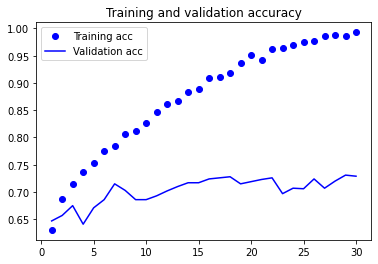

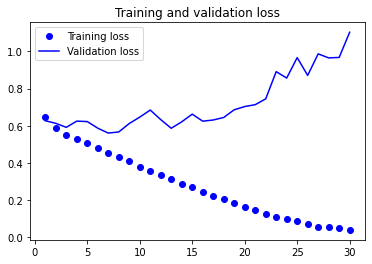

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Options against overfitting

## Using data augmentation

<div class="alert alert-block alert-info">
<font color=black><br>

- Because you have relatively few training samples (2,000), overfitting will be your **number-one** concern.
- Dropout and L2 regularization are all valid techniques to combact overfitting.
- However, when it comes to computer vision **data augmentation** is used almost universally.
- Overfitting is caused by having too few samples to learn from, rendering you unable to train a model that can generalize to new data. 
- Given infinite data, your model would be exposed to every possible aspect of the data distribution at hand: you would **never** overfit. ->> ?
- In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the **ImageDataGenerator** instance. 

<br></font>
</div>

In [48]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [51]:
fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]
# Choose one imagine
img_path = fnames[3]
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))
# Convert to a numpy array with shape (150,150,3)
x = image.img_to_array(img)
# reshapes it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

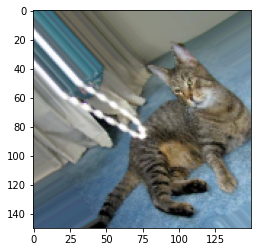

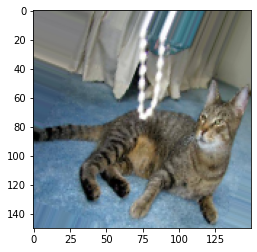

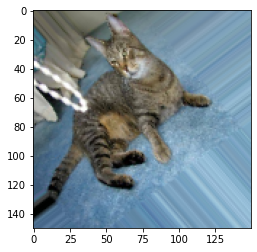

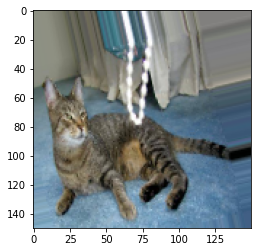

In [53]:
# Display the first four of them
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break
plt.show()

<div class="alert alert-block alert-info">
<font color=black><br>

- With this data-augmentation configuration, the network will never see the same input twice.
- The inputs it sees are still heavily intercor- related, because they come from a small number of original images—you can’t pro- duce new information, you can only remix existing information.
- To further fight overfitting, you’ll also add a Dropout layer to your model.

<br></font>
</div>

In [54]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [57]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [58]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [59]:
# Note that the validation data shouldn’t be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

In [60]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [61]:
# Because you use binary_crossentropy loss, you need binary labels.
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [62]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 45s 425ms/step - loss: 0.7005 - acc: 0.4904 - val_loss: 0.6879 - val_acc: 0.5030


In [63]:
# Saving the model
model.save('cats_and_dogs_small_2.h5')

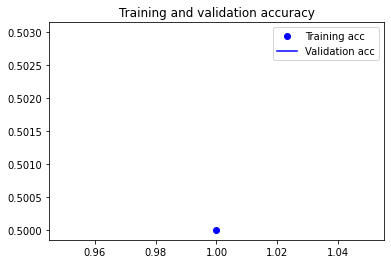

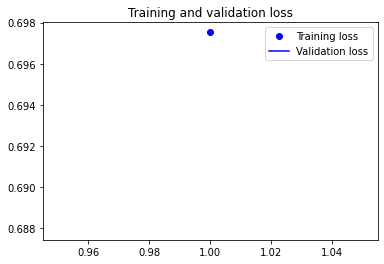

In [64]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
"""
SOMETHING HAS GONE WRONG HERE!
"""

## Using a pretrained convnet

<div class="alert alert-block alert-info">
<font color=black><br>

- As a next step to improve your accuracy on this problem, you’ll have to use a pretrained model.
- A pretrained network is a saved network that was previously trained on a large dataset.
- You might train a network on ImageNet (mostly animals and everyday objects) and then **repurpose** this trained network for something as remote as identifying furniture items in images.
- Such **portability** of learned features across different problems is a key advan- tage of deep learning.
- ImageNet dataset  has 1.4 million labeled images and 1,000 different classes.
- We'll use the **VGG16** architecture, developed by Karen Simonyan and Andrew Zisserman in 2014.
- There are two ways to use a pretrained network: **feature extraction** and **fine-tuning**.

<br></font>
</div>

### Feature extraction

<div class="alert alert-block alert-info">
<font color=black><br>

- Feature extraction consists of using the representations learned by a previous network to extract interesting features from new samples. 
- These features are then run through a new classifier, which is trained from scratch.
- Why only reuse the convolutional base and not the densely connected classifier as well? In general, doing so should be avoided. The reason is that the representations learned by the convolutional base are likely to be more generic and therefore more reusable. 
- Additionally, representations found in densely connected layers no longer contain any information about where objects are located in the input image. For problems where object location matters, densely connected features are largely useless 
- So if your new dataset differs a lot from the dataset on which the original model was trained, you may be better off using only the first few layers of the model to do feature extraction, rather than using the entire convolutional base. 
- In **this case** because of the similarity with ImageNet, it’s likely to be beneficial to reuse the information contained in the densely connected layers of the original model.
- Nevertheless, we still decided not to do it just to show hit works.
- **weights** specifies the weight checkpoint from which to initialize the model.
- **include_top** refers to including (or not) the densely connected classifier on top of the network which we ddo not want.

<br></font>
</div>

In [71]:
conv_base = VGG16(weights='imagenet',
                  include_top=False)

In [72]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

# Conclusion

<div class="alert alert-block alert-danger">
<font color=black><br>

- Convnets are the best type of machine-learning models for computer-vision tasks. It’s possible to train one from scratch even on a very small dataset, with decent results.
- On a small dataset, overfitting will be the main issue. Data augmentation is a powerful way to fight overfitting when you’re working with image data.
- It’s easy to reuse an existing convnet on a new dataset via feature extraction. This is a valuable technique for working with small image datasets.
-  As a complement to feature extraction, you can use fine-tuning, which adapts to a new problem some of the representations previously learned by an existing model. This pushes performance a bit further.

<br></font>
</div>

# References

<div class="alert alert-warning">
<font color=black>

- Chollet, Francois. Deep learning with Python. Vol. 361. New York: Manning, 2018.
- [Dataset reference](https://www.kaggle.com/c/dogs-vs-cats/data)

</font>
</div>